In [1]:
# import the libraries

from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

In [2]:
train = '/content/drive/My Drive/DS_Dataset/Planes/Train'
test = '/content/drive/My Drive/DS_Dataset/Planes/Test'

In [3]:
# re-size all the images to this

IMAGE_SIZE = [224, 224, 3]

In [4]:
# This will be our input layer to be given to Model

vgg19 = VGG19(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [5]:
# To make pretrained weights non-trainable 

for layer in vgg19.layers:
    layer.trainable = False

In [6]:
# To get the number of output classes

op_classes = glob('/content/drive/My Drive/DS_Dataset/Planes/Train/*')

In [7]:
op_classes

['/content/drive/My Drive/DS_Dataset/Planes/Train/missile',
 '/content/drive/My Drive/DS_Dataset/Planes/Train/helicopter',
 '/content/drive/My Drive/DS_Dataset/Planes/Train/fighter-jet',
 '/content/drive/My Drive/DS_Dataset/Planes/Train/drone']

In [8]:
# Flattening the output of pretrained model

x = Flatten()(vgg19.output)

In [9]:
# Create output layer to be given to Model

pred_layer = Dense(len(op_classes), activation='softmax')(x)

In [10]:
# create a model object

model = Model(inputs=vgg19.input, outputs=pred_layer)

In [11]:
model.output_shape

(None, 4)

In [12]:
# To view the structure of the model

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [13]:
# For compiling the model give loss and optimizer 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# Use the Image Data Generator to import the images from the dataset

train_data = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

test_data = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make the train data ready for fit after data augmentation

training_set = train_data.flow_from_directory('/content/drive/My Drive/DS_Dataset/Planes/Train',
                                              target_size = (224, 224),
                                              batch_size = 16,
                                              class_mode = 'categorical')

Found 4132 images belonging to 4 classes.


In [16]:
# Make the train data ready for fit after rescaling

test_set = test_data.flow_from_directory('/content/drive/My Drive/DS_Dataset/Planes/Test',
                                          target_size = (224, 224),
                                          batch_size = 16,
                                          class_mode = 'categorical')

Found 1691 images belonging to 4 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute

vgg_model = model.fit(training_set,
                      validation_data=test_set,
                      epochs=10,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set)) 

Epoch 1/10
259/259 [==============================] - 6507s 25s/step - loss: 1.1023 - accuracy: 0.6029 - val_loss: 1.0795 - val_accuracy: 0.6322
Epoch 2/10
259/259 [==============================] - 164s 632ms/step - loss: 0.7829 - accuracy: 0.7210 - val_loss: 2.1178 - val_accuracy: 0.4447
Epoch 3/10
259/259 [==============================] - 161s 621ms/step - loss: 0.7210 - accuracy: 0.7478 - val_loss: 1.0804 - val_accuracy: 0.6564
Epoch 4/10
259/259 [==============================] - 157s 607ms/step - loss: 0.5941 - accuracy: 0.7897 - val_loss: 1.0304 - val_accuracy: 0.6907
Epoch 5/10
259/259 [==============================] - 158s 610ms/step - loss: 0.5347 - accuracy: 0.8122 - val_loss: 1.2714 - val_accuracy: 0.6541
Epoch 6/10
259/259 [==============================] - 155s 598ms/step - loss: 0.4777 - accuracy: 0.8245 - val_loss: 1.0944 - val_accuracy: 0.6937
Epoch 7/10
259/259 [==============================] - 154s 595ms/step - loss: 0.4406 - accuracy: 0.8439 - val_loss: 1.1632 - 

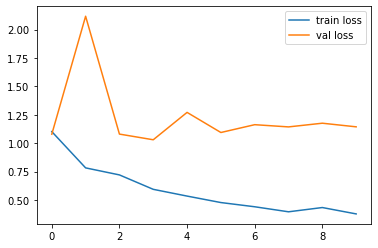

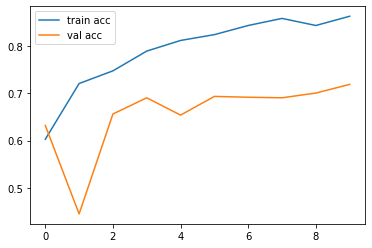

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(vgg_model.history['loss'], label='train loss')
plt.plot(vgg_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg_model.history['accuracy'], label='train acc')
plt.plot(vgg_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
y_pred = model.predict(test_set)

In [20]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.

model.save('Planes_VGG19.h5') 